# IrisClassification

Project for IBM AI Engineering certification course.

## Modules

In [1]:
!pip install pandas numpy matplotlib scikit-learn torch torchvision torchaudio -q

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from torch.utils.data import DataLoader, TensorDataset

## Dataset

In [3]:
iris = load_iris()

X = iris.data
y = iris.target

In [4]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (150, 4)
y shape: (150,)


In [5]:
values, counts = np.unique(y, return_counts=True)

print(values, counts)

[0 1 2] [50 50 50]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

## Model

In [8]:
class ClassificationNet(nn.Module):
    def __init__(self, input_units=30, hidden_units=64, output_units=2):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_units, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_units)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_32 = ClassificationNet(input_units=4, hidden_units=32, output_units=3)
model_16 = ClassificationNet(input_units=4, hidden_units=16, output_units=3)

In [9]:
def train(model, epochs, criterion, optimizer, plot=True):
  train_losses = []
  test_losses = []

  for epoch in range(epochs):
      model.train()
      running_loss = 0.0
      for X_batch, y_batch in train_loader:
          optimizer.zero_grad()
          outputs = model(X_batch)
          loss = criterion(outputs, y_batch)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

      train_loss = running_loss / len(train_loader)
      train_losses.append(train_loss)

      model.eval()
      test_loss = 0.0
      with torch.no_grad():
          for X_batch, y_batch in test_loader:
              test_outputs = model(X_batch)
              loss = criterion(test_outputs, y_batch)
              test_loss += loss.item()

      test_loss /= len(test_loader)
      test_losses.append(test_loss)

      print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

  if plot:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Test Loss Curve ({model.__class__})')
    plt.legend()
    plt.grid(True)
    plt.show()

## 32 Hidden

Epoch [1/10], Train Loss: 1.0579, Test Loss: 0.9007
Epoch [2/10], Train Loss: 0.7916, Test Loss: 0.6927
Epoch [3/10], Train Loss: 0.6063, Test Loss: 0.5498
Epoch [4/10], Train Loss: 0.4794, Test Loss: 0.4607
Epoch [5/10], Train Loss: 0.3990, Test Loss: 0.4025
Epoch [6/10], Train Loss: 0.3463, Test Loss: 0.3642
Epoch [7/10], Train Loss: 0.3087, Test Loss: 0.3330
Epoch [8/10], Train Loss: 0.2790, Test Loss: 0.3074
Epoch [9/10], Train Loss: 0.2555, Test Loss: 0.2863
Epoch [10/10], Train Loss: 0.2351, Test Loss: 0.2697


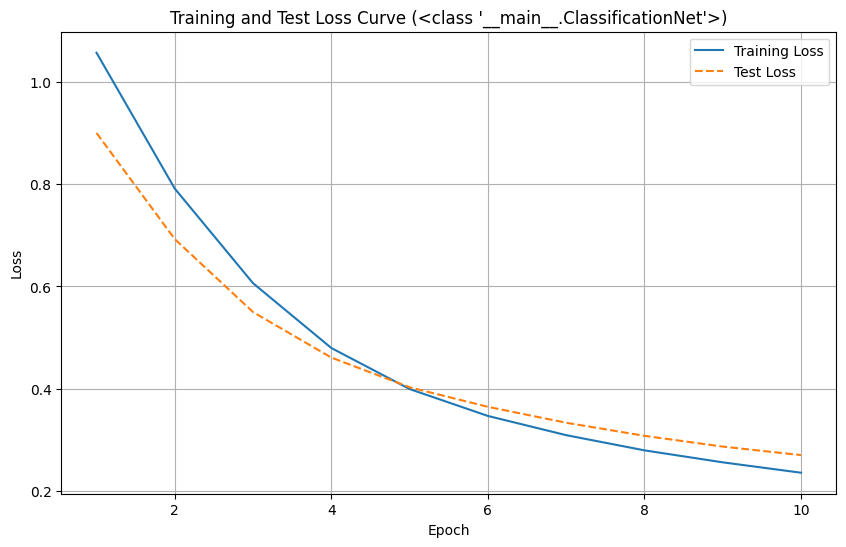

In [10]:
train(
  model_32,
  epochs = 10,
  criterion = nn.CrossEntropyLoss(),
  optimizer = optim.Adam(model_32.parameters(), lr=0.001)
)

## 16 Hidden

Epoch [1/10], Train Loss: 0.9236, Test Loss: 0.8399
Epoch [2/10], Train Loss: 0.7612, Test Loss: 0.6986
Epoch [3/10], Train Loss: 0.6296, Test Loss: 0.5943
Epoch [4/10], Train Loss: 0.5329, Test Loss: 0.5217
Epoch [5/10], Train Loss: 0.4656, Test Loss: 0.4708
Epoch [6/10], Train Loss: 0.4140, Test Loss: 0.4312
Epoch [7/10], Train Loss: 0.3752, Test Loss: 0.4011
Epoch [8/10], Train Loss: 0.3457, Test Loss: 0.3773
Epoch [9/10], Train Loss: 0.3188, Test Loss: 0.3540
Epoch [10/10], Train Loss: 0.2977, Test Loss: 0.3359


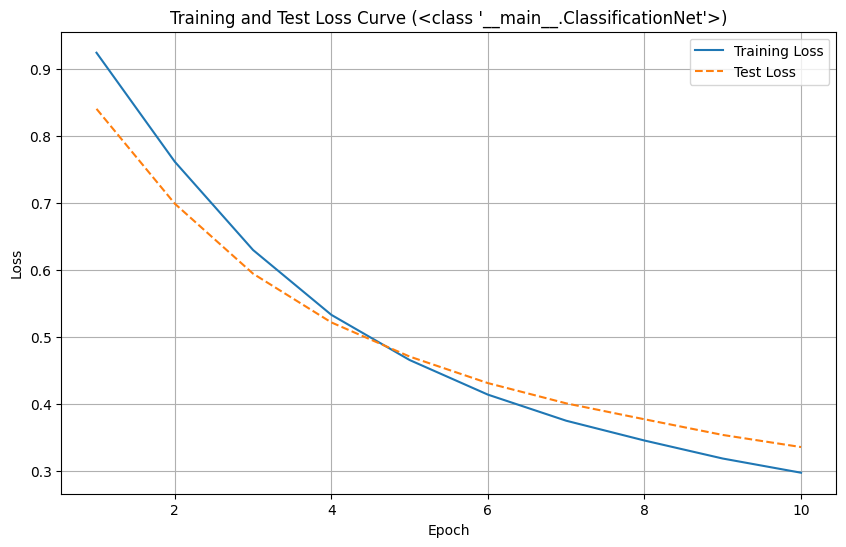

In [11]:
train(
  model_16,
  epochs = 10,
  criterion = nn.CrossEntropyLoss(),
  optimizer = optim.Adam(model_16.parameters(), lr=0.001)
)